In [32]:
pip install yfinance beautifulsoup4 pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.6/904.6 kB 6.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: selenium
    Found existing installation: selenium 4.27.1
    Uninstalling selenium-4.27.1:
      Successfully uninstalled selenium-4.27.1

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
# List available styles
print(plt.style.available)

# Configure Matplotlib with a valid style
# plt.style.use('seaborn-darkgrid') 
# Configure Matplotlib
plt.style.use('seaborn-v0_8-notebook')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [18]:
# Download Tesla stock data
tesla_data = yf.Ticker("TSLA")
tesla_stock = tesla_data.history(period="max")

# Display the first few rows
tesla_stock.reset_index(inplace=True)
print(tesla_stock.head())

# Save to CSV
tesla_stock.to_csv("tesla_stock.csv", index=False)

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [ ]:
# Web scrape Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract table data
tables = soup.find_all('table')
tesla_revenue = pd.read_html(str(tables))[1]

# Clean the data
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(r'\$', '').str.replace(',', '').astype(float)
tesla_revenue.dropna(inplace=True)

# Display the cleaned data
print(tesla_revenue.head())

# Save to CSV
tesla_revenue.to_csv("tesla_revenue.csv", index=False)

In [38]:
# Download GameStop stock data
gme_data = yf.Ticker("GME")
gme_stock = gme_data.history(period="max")

# Display the first few rows
gme_stock.reset_index(inplace=True)
print(gme_stock.head())

# Save to CSV
gme_stock.to_csv("gme_stock.csv", index=False)

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [ ]:
# Web scrape GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract table data
tables = soup.find_all('table')
gme_revenue = pd.read_html(str(tables))[1]

# Clean the data
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'\$', '').str.replace(',', '').astype(float)
gme_revenue.dropna(inplace=True)

# Display the cleaned data
print(gme_revenue.head())

# Save to CSV
gme_revenue.to_csv("gme_revenue.csv", index=False)

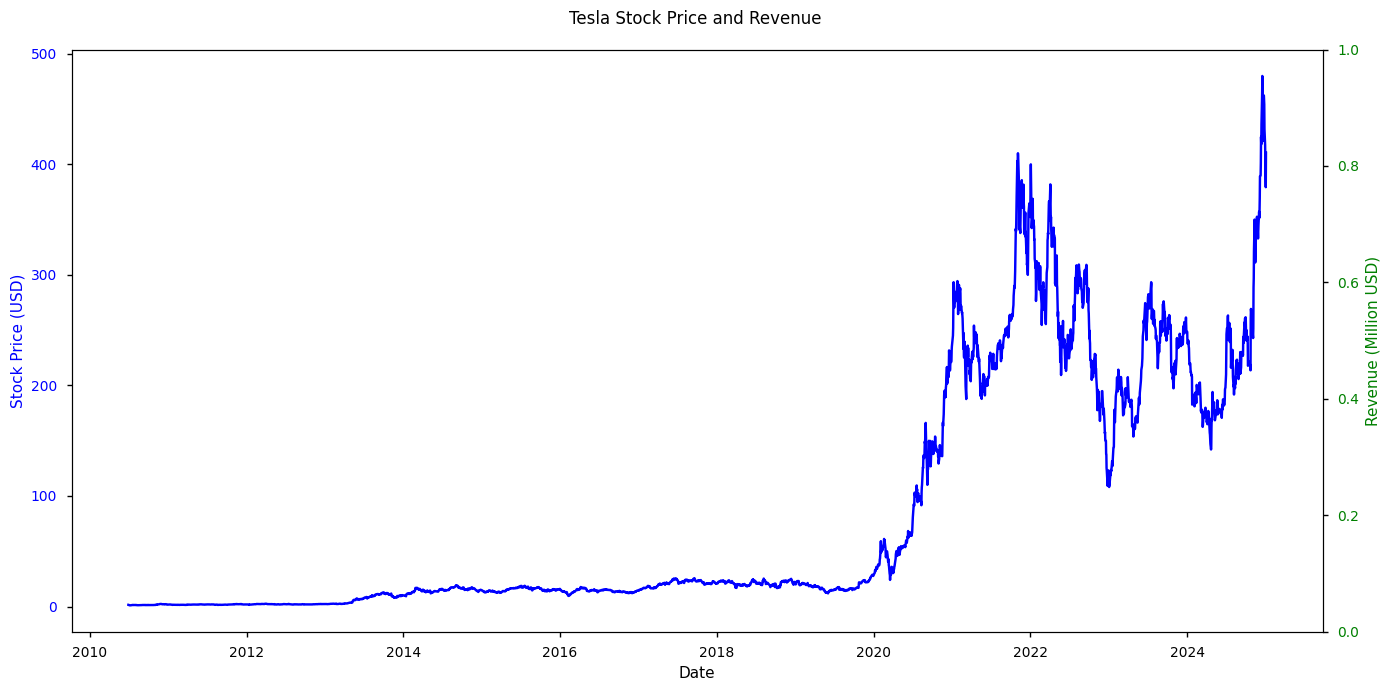

In [39]:
# Plot Tesla Stock Price and Revenue
fig, ax1 = plt.subplots(figsize=(14, 7))

# Stock Price
ax1.plot(tesla_stock['Date'], tesla_stock['Close'], color='blue', label="Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Revenue
ax2 = ax1.twinx()
# ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='green', label="Revenue")
ax2.set_ylabel("Revenue (Million USD)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.suptitle("Tesla Stock Price and Revenue")
fig.tight_layout()
plt.show()

NameError: name 'gme_revenue' is not defined

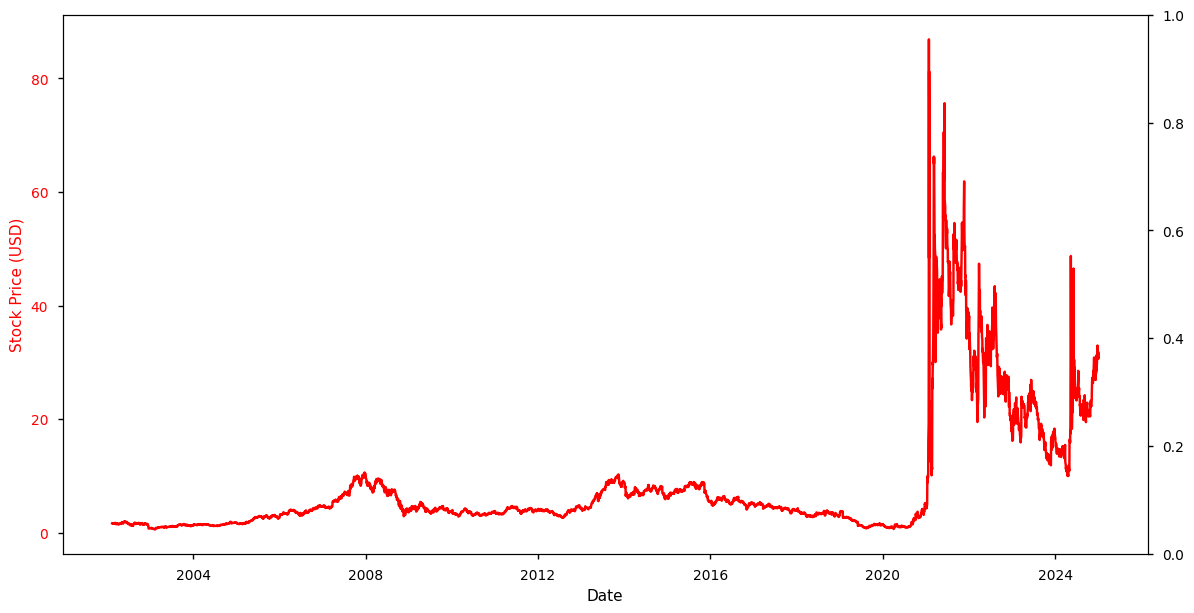

In [40]:
# Plot GameStop Stock Price and Revenue
fig, ax1 = plt.subplots(figsize=(14, 7))

# Stock Price
ax1.plot(gme_stock['Date'], gme_stock['Close'], color='red', label="Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Revenue
ax2 = ax1.twinx()
ax2.plot(gme_revenue['Date'], gme_revenue['Revenue'], color='purple', label="Revenue")
ax2.set_ylabel("Revenue (Million USD)", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

fig.suptitle("GameStop Stock Price and Revenue")
fig.tight_layout()
plt.show()